> ##### load data ( CSV ) #####

In [1]:
import pandas as pd

filename = '../data/biz_log.json.csv'
data = pd.read_csv( filename, sep=',', engine='python', dtype='object', )

In [2]:
data.head()

,emp_cd,user_id,user_ip,dept_cd,org_cd,hq_cd,join_ssn,sear_val,inq_seq,per_inf_cd,...,recv_no,recv_yyyy,busi_cd,busi_dtl_contn,button_cd,prg_id,req_url,log_seq,sys_cd,proc_datetime
0,20150068,20150068,10.1.72.55,DB5,DB0,00,dd90baa12f3f6d4bef1a506c856ee5f9,NaN,6626256,NaN,...,NaN,NaN,02,1498,R,NaN,http://biznet.hira.or.kr/ga/gac/selectDramtStd...,41596,AB01,2017-11-01 10:30:36
1,20150068,20150068,10.1.72.55,DB5,DB0,00,dd90baa12f3f6d4bef1a506c856ee5f9,NaN,6626255,NaN,...,NaN,NaN,02,NaN,R,NaN,http://biznet.hira.or.kr/ga/gac/selectDramtStd...,41595,AB01,2017-11-01 10:30:35
2,20150068,20150068,10.1.72.55,DB5,DB0,00,dd90baa12f3f6d4bef1a506c856ee5f9,NaN,6626254,NaN,...,NaN,NaN,02,NaN,R,NaN,http://biznet.hira.or.kr/ga/gac/selectDramtStd...,41594,AB01,2017-11-01 10:26:38
3,20150068,20150068,10.1.72.55,DB5,DB0,00,dd90baa12f3f6d4bef1a506c856ee5f9,NaN,6626253,NaN,...,NaN,NaN,02,NaN,R,NaN,http://biznet.hira.or.kr/ga/gac/selectDramtStd...,41593,AB01,2017-11-01 10:26:36
4,20162405,20162405,10.100.4.66,CH9,CH0,00,dd90baa12f3f6d4bef1a506c856ee5f9,NaN,6626379,NaN,...,NaN,NaN,01,invision,R,NaN,http://biznet.hira.or.kr/ga/gae/selectUserInfo.do,41592,AB01,2017-11-01 14:25:21


In [2]:
test_data = data[['user_id', 'proc_datetime']]

> ##### date and time column ( pre-processing ) #####

In [6]:
test_data['date'] = test_data['proc_datetime'].apply( pd.Timestamp ).dt.date.astype('string').copy()

C:\Users\user\AppData\Local\Temp\ipykernel_22192\2496065875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['date'] = test_data['proc_datetime'].apply( pd.Timestamp ).dt.date.astype('string').copy()


In [7]:
test_data['time'] = test_data['proc_datetime'].apply( pd.Timestamp ).dt.time.astype('string').copy()

C:\Users\user\AppData\Local\Temp\ipykernel_22192\2005952906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['time'] = test_data['proc_datetime'].apply( pd.Timestamp ).dt.time.astype('string').copy()


In [8]:
test_data['datetime'] = test_data['proc_datetime'].apply( pd.Timestamp ).copy()

C:\Users\user\AppData\Local\Temp\ipykernel_22192\3788556570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['datetime'] = test_data['proc_datetime'].apply( pd.Timestamp ).copy()


In [18]:
test_data.head(3)

,user_id,proc_datetime,date,time,datetime
0,20150068,2017-11-01 10:30:36,2017-11-01,10:30:36,2017-11-01 10:30:36
1,20150068,2017-11-01 10:30:35,2017-11-01,10:30:35,2017-11-01 10:30:35
2,20150068,2017-11-01 10:26:38,2017-11-01,10:26:38,2017-11-01 10:26:38


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7783 entries, 0 to 7782
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        7783 non-null   object
 1   proc_datetime  7783 non-null   object
 2   date           7783 non-null   string
 3   time           7783 non-null   string
 4   datetime       7783 non-null   string
dtypes: object(2), string(3)
memory usage: 304.1+ KB


In [5]:
from datetime import datetime
import time 
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib.dates import (
    DateFormatter, AutoDateLocator, AutoDateFormatter, datestr2num
)
import seaborn as sns

%matplotlib inline

In [9]:
x = datestr2num( [
    datetime.strptime( day, '%Y-%m-%d' ).strftime('%m-%d-%Y')
    for day in test_data['date']
])
x

array([17471., 17471., 17471., ..., 17471., 17471., 17483.])

In [10]:

y = datestr2num( [
    datetime.strptime( time, '%H:%M:%S' ).strftime('%H:%M:%S')  
    for time in test_data['time']
])
y  

array([19461.43791667, 19461.43790509, 19461.43516204, ...,
       19461.00112269, 19461.00040509, 19461.4837037 ])

In [11]:
# test_data['proc_datetime'].apply(lambda x: time.mktime(datetime.strptime(x, '%Y-%m-%d %H:%M:%S').tuple()))
z = test_data['proc_datetime'].apply( pd.to_datetime ).map(pd.Timestamp.timestamp).astype('int64').values
z

array([1509532236, 1509532235, 1509531998, ..., 1509494497, 1509494435,
       1510572992], dtype=int64)

> ##### date column ( axis-x ) #####

C:\Users\user\AppData\Local\Temp\ipykernel_22192\1051705572.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, 'bo-', color = 'dodgerblue') #Plot the data


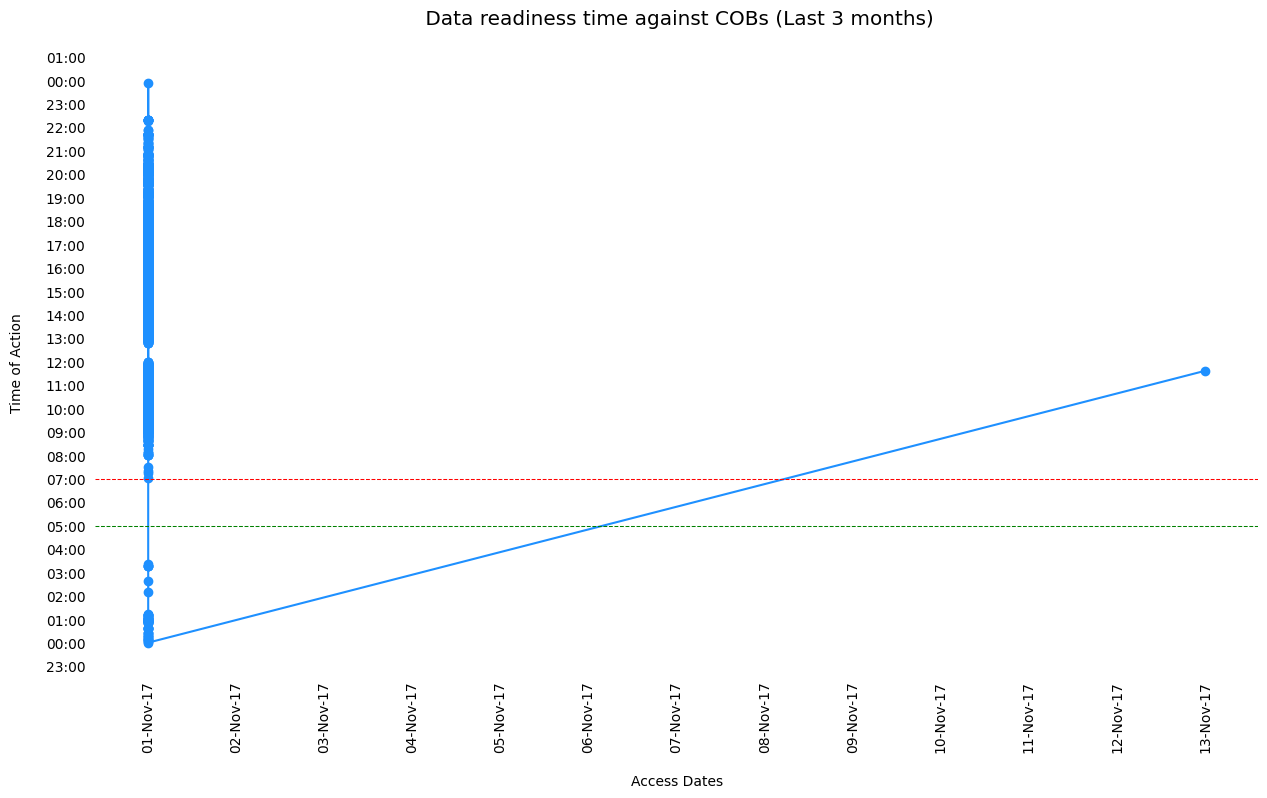

In [12]:
###### Make the Timeseries plot of delivery time in y axis vs delivery date in x axis ######
fig, ax = plt.subplots(figsize=(15,8))
ax.clear() # Clear the axes
ax.plot(x, y, 'bo-', color = 'dodgerblue') #Plot the data
# sns.lmplot(x, y, 'bo-', color = 'dodgerblue', ax=ax) #Plot the data
#Below two lines are to draw a horizontal line for 05 AM and 07 AM position
plt.axhline(y = mdates.date2num (pd.to_datetime('07:00')), color = 'red', linestyle = '--', linewidth = 0.75)
plt.axhline(y = mdates.date2num (pd.to_datetime('05:00')), color = 'green', linestyle = '--', linewidth = 0.75)
plt.xticks(x, rotation = 'vertical')
ax.yaxis_date()
ax.xaxis_date()
#Below 6 lines are about setting the format with which I want my xor y ticks and their labels to be displayed
yfmt = mdates.DateFormatter('%H:%M') 
xfmt = mdates.DateFormatter('%d-%b-%y')
ax.yaxis.set_major_formatter(yfmt)
ax.xaxis.set_major_formatter(xfmt)
ax.yaxis.set_major_locator(mdates.HourLocator(interval=1))   # Every 1 Hour
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   # Every 1 Day

####### Name the x,y labels, titles and beautify the plot #######
plt.style.use('bmh')
plt.xlabel('\nAccess Dates')
plt.ylabel('Time of Action\n')
plt.title(" Data readiness time against COBs (Last 3 months)\n")
plt.rcParams["font.size"] = "12" #Change the font 
# plt.rcParams["font.family"] = "Times New Roman" # Set the font type if needed
plt.tick_params(left = False, bottom = False, labelsize = 10) #Remove ticks, make tick labelsize 10
plt.box(False)

plt.show()

> ##### datetime column ( axis-x ) #####

AttributeError: module 'seaborn' has no attribute 'plot'

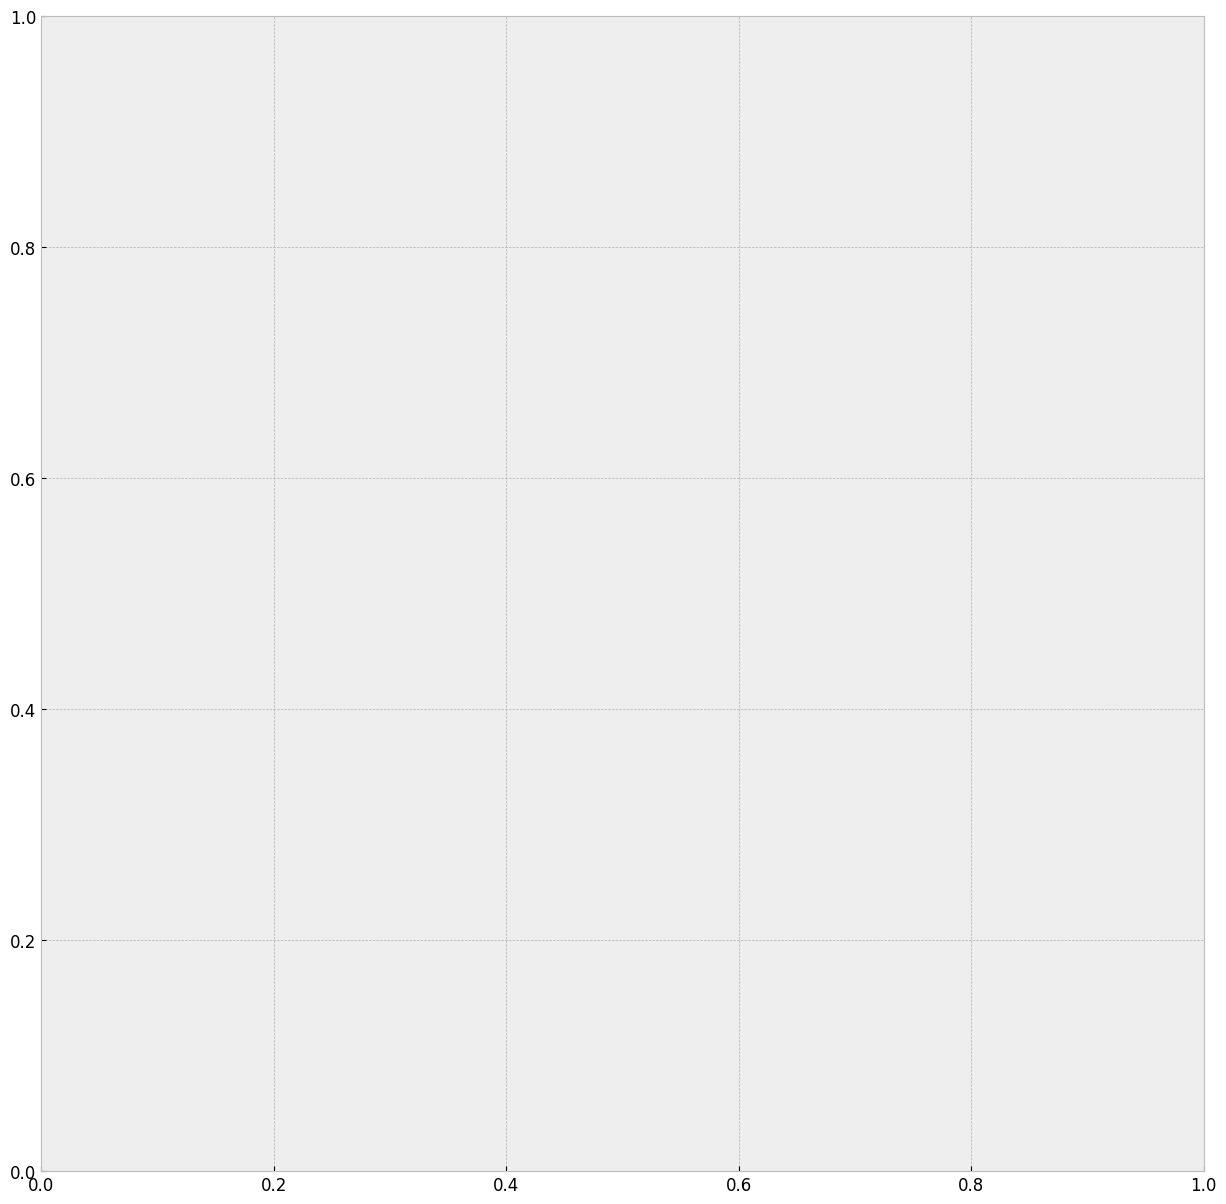

In [85]:
###### Make the Timeseries plot of delivery time in y axis vs delivery date in x axis ######
fig, ax = plt.subplots(figsize=(15,8))
ax.clear() # Clear the axes
ax.plot(z, y, 'bo-', color = 'dodgerblue') #Plot the data
#Below two lines are to draw a horizontal line for 05 AM and 07 AM position
plt.axhline(y = mdates.date2num (pd.to_datetime('07:00')), color = 'red', linestyle = '--', linewidth = 0.75)
plt.axhline(y = mdates.date2num (pd.to_datetime('05:00')), color = 'green', linestyle = '--', linewidth = 0.75)
plt.xticks(z, rotation = 'vertical')
ax.yaxis_date()
ax.xaxis_date()
#Below 6 lines are about setting the format with which I want my xor y ticks and their labels to be displayed
yfmt = mdates.DateFormatter('%H:%M') 
zfmt = mdates.DateFormatter('%d-%b-%y %H:%M')
ax.yaxis.set_major_formatter(yfmt)
ax.xaxis.set_major_formatter(zfmt)
ax.yaxis.set_major_locator(mdates.HourLocator(interval=1))   # Every 1 Hour
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))   # Every 1 Hour

####### Name the x,y labels, titles and beautify the plot #######
plt.style.use('bmh')
plt.xlabel('\nAccess Date Time')
plt.ylabel('Time of Action\n')
plt.title(" Data readiness time against COBs (Last 3 months)\n")
plt.rcParams["font.size"] = "12" #Change the font 
# plt.rcParams["font.family"] = "Times New Roman" # Set the font type if needed
plt.tick_params(left = False, bottom = False, labelsize = 10) #Remove ticks, make tick labelsize 10
plt.box(False)

plt.show()

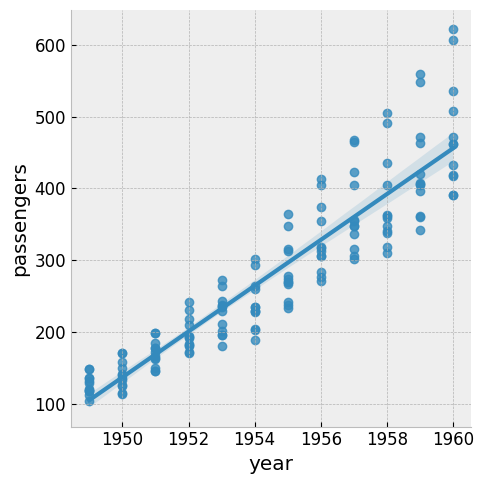

In [93]:
import pandas as pd
import seaborn as sns

data = sns.load_dataset("flights")
flights = pd.DataFrame(data)

# 막대 그래프 (오차범위 포함)
sns.lmplot(data=flights, x='year', y='passengers')

In [95]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


> ##### Add days column #####

In [27]:
days = [ 'mon', 'tue', 'wed', 'thi', 'fri', 'sat', 'sun' ]

test_data['days'] =  test_data['proc_datetime'].apply( pd.to_datetime ).map( datetime.weekday ).map( lambda x: days[x] )


test_data, d

C:\Users\user\AppData\Local\Temp\ipykernel_22192\2797419549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['days'] =  test_data['proc_datetime'].apply( pd.to_datetime ).map( datetime.weekday ).map( lambda x: days[x] )


(       user_id        proc_datetime        date      time            datetime  \
 0     20150068  2017-11-01 10:30:36  2017-11-01  10:30:36 2017-11-01 10:30:36   
 1     20150068  2017-11-01 10:30:35  2017-11-01  10:30:35 2017-11-01 10:30:35   
 2     20150068  2017-11-01 10:26:38  2017-11-01  10:26:38 2017-11-01 10:26:38   
 3     20150068  2017-11-01 10:26:36  2017-11-01  10:26:36 2017-11-01 10:26:36   
 4     20162405  2017-11-01 14:25:21  2017-11-01  14:25:21 2017-11-01 14:25:21   
 ...        ...                  ...         ...       ...                 ...   
 7778  20060107  2017-11-01 00:06:50  2017-11-01  00:06:50 2017-11-01 00:06:50   
 7779  19930011  2017-11-01 00:04:32  2017-11-01  00:04:32 2017-11-01 00:04:32   
 7780  19930011  2017-11-01 00:01:37  2017-11-01  00:01:37 2017-11-01 00:01:37   
 7781  19930011  2017-11-01 00:00:35  2017-11-01  00:00:35 2017-11-01 00:00:35   
 7782  20162405  2017-11-13 11:36:32  2017-11-13  11:36:32 2017-11-13 11:36:32   
 
      days  
 

In [14]:
test_data.days.unique()

array(['wed', 'mon'], dtype=object)

> ##### days column ( axis-x ) #####

C:\Users\user\AppData\Local\Temp\ipykernel_22192\3066607747.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax.plot( d, y, 'bo-', color = 'dodgerblue') #Plot the data


ValueError: The number of FixedLocator locations (7783), usually from a call to set_ticks, does not match the number of labels (7).

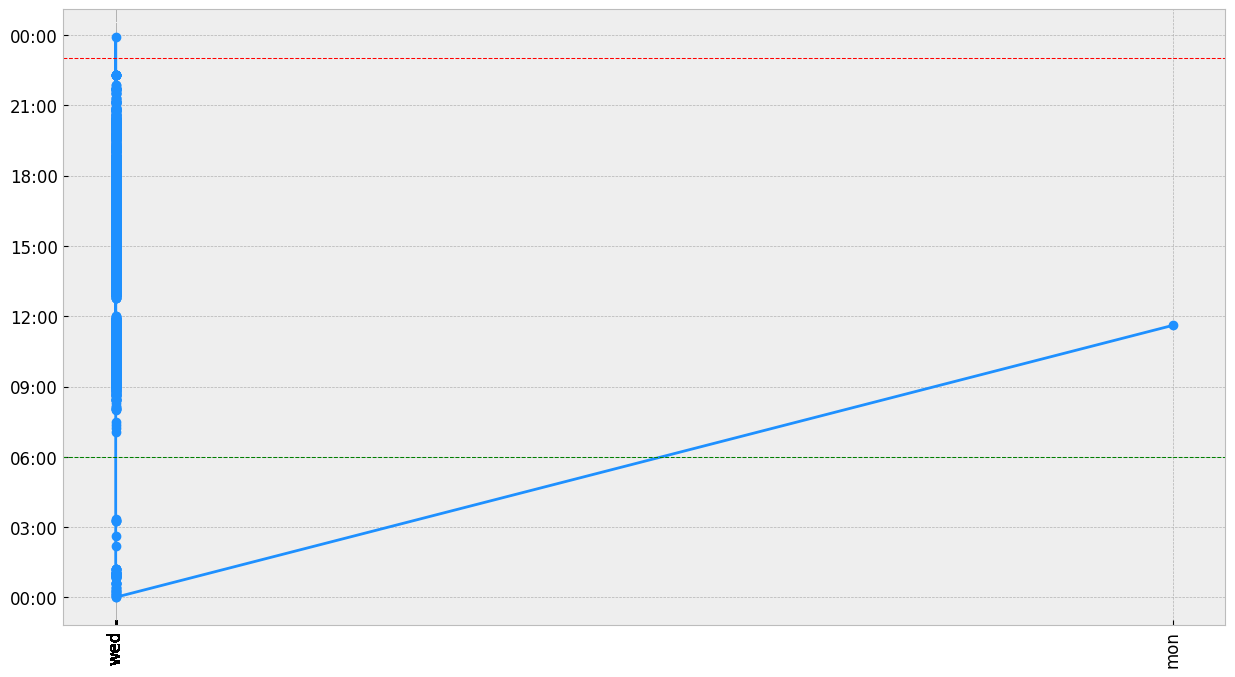

In [26]:
###### Make the Timeseries plot of delivery time in y axis vs delivery date in x axis ######
fig, ax = plt.subplots(figsize=(15,8))
ax.clear() # Clear the axes
ax.plot( d, y, 'bo-', color = 'dodgerblue') #Plot the data
#Below two lines are to draw a horizontal line for 05 AM and 07 AM position
plt.axhline(y = mdates.date2num (pd.to_datetime('23:00')), color = 'red', linestyle = '--', linewidth = 0.75)
plt.axhline(y = mdates.date2num (pd.to_datetime('06:00')), color = 'green', linestyle = '--', linewidth = 0.75)
plt.xticks(d, rotation = 'vertical')
ax.yaxis_date()
# ax.xaxis_date()
#Below 6 lines are about setting the format with which I want my xor y ticks and their labels to be displayed
yfmt = mdates.DateFormatter('%H:%M') 
# zfmt = mdates.DateFormatter('%d-%b-%y %H:%M')
ax.yaxis.set_major_formatter(yfmt)
# ax.xaxis.set_major_formatter(zfmt)
ax.yaxis.set_major_locator(mdates.HourLocator(interval=1))   # Every 1 Hour
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))   # Every 1 Hour

####### Name the x,y labels, titles and beautify the plot #######
plt.style.use('bmh')
plt.xlabel('\nAccess Days')
plt.ylabel('Time of Action\n')
plt.title(" Data readiness time against Access ( For Days)\n")
plt.rcParams["font.size"] = "12" #Change the font 
# plt.rcParams["font.family"] = "Times New Roman" # Set the font type if needed
plt.tick_params(left = False, bottom = False, labelsize = 10) #Remove ticks, make tick labelsize 10
plt.box(False)

plt.show()